# Customer Churn Prediction using Artificial Neural Networks (ANN)

## Problem Statement
The goal of this project is to predict customer churn using an Artificial Neural Network (ANN). The dataset contains customer information such as credit score, geography, gender, age, tenure, balance, and other features. The target variable is `Exited`, which indicates whether a customer has left the service (1) or not (0). The model aims to classify whether a customer is likely to leave or stay with the service.

## Dataset
The dataset used in this project is available on [Kaggle](https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv). It contains 10,000 rows and 14 columns, including features like `CreditScore`, `Geography`, `Gender`, `Age`, `Balance`, and `Exited`.

## Approach
1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data by handling missing values, encoding categorical features, and scaling numerical variables.
3. Build and train an ANN model to predict customer churn.
4. Evaluate the model using metrics like accuracy, confusion matrix, and ROC-AUC score.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/churn-modellingcsv/Churn_Modelling.csv')



In [2]:
# Display the first few rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for missing values
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## # Exploratory Data Analysis (EDA)

## Overview of the Dataset
- The dataset contains **10,000 rows** and **14 columns**.
- Features include `CreditScore`, `Geography`, `Gender`, `Age`, `Balance`, `EstimatedSalary`, and `Exited` (target variable).
- No missing values were found in the dataset.

## Key Insights from EDA
1. **Class Distribution**:
   - The dataset is imbalanced, with most customers not churning (`Exited=0`).
   - Churn rate: Approximately 20% of customers churned.

2. **Numerical Features**:
   - `CreditScore`: Normally distributed, with most scores between 600 and 800.
   - `Age`: Right-skewed distribution, with most customers between 30 and 50 years old.
   - `Balance`: Bimodal distribution, with peaks at 0 and around 125,000.
   - `EstimatedSalary`: Uniformly distributed.

3. **Categorical Features**:
   - `Geography`: Most customers are from France, followed by Germany and Spain.
   - `Gender`: Slightly more male customers than female customers.
   - `NumOfProducts`: Most customers have 1 or 2 products.

4. **Correlation Heatmap**:
   - `Age` and `Balance` show a weak positive correlation with churn (`Exited`).
   - `CreditScore` and `EstimatedSalary` show no significant correlation with churn.

## Visualizations


### 1. Distribution of Numerical Features
Visualize the distribution of numerical features like Age, CreditScore, Balance, etc.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

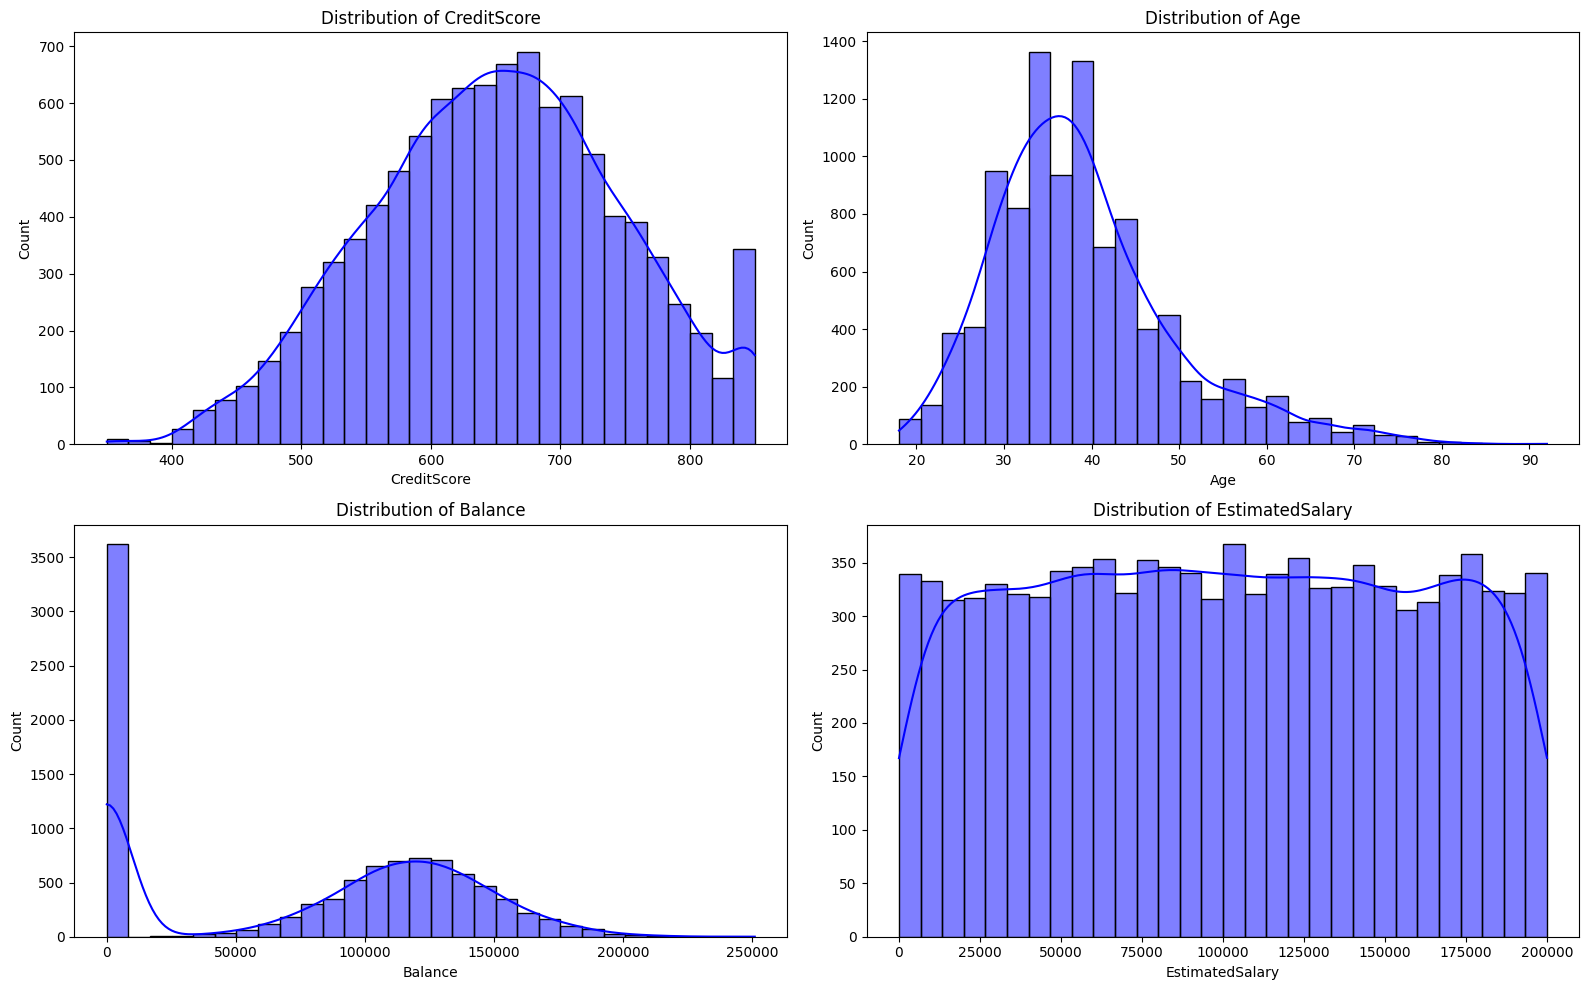

In [5]:
# Select numerical features
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plot histograms for numerical features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### 2. Distribution of Categorical Features
Visualize the distribution of categorical features like Geography, Gender, and NumOfProducts.

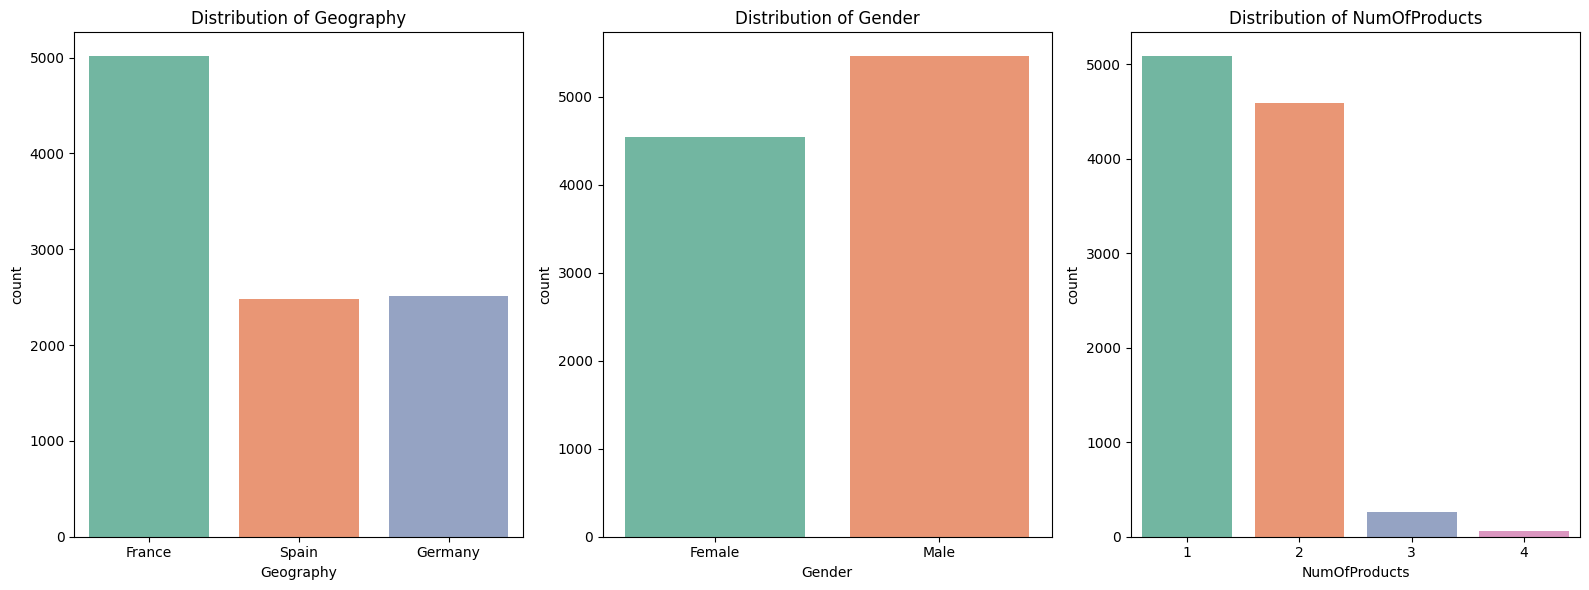

In [6]:
# Select categorical features
categorical_features = ['Geography', 'Gender', 'NumOfProducts']

# Plot count plots for categorical features
plt.figure(figsize=(16, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[feature], palette='Set2')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### 3. Correlation Heatmap
Visualize the correlation between numerical features to identify relationships.

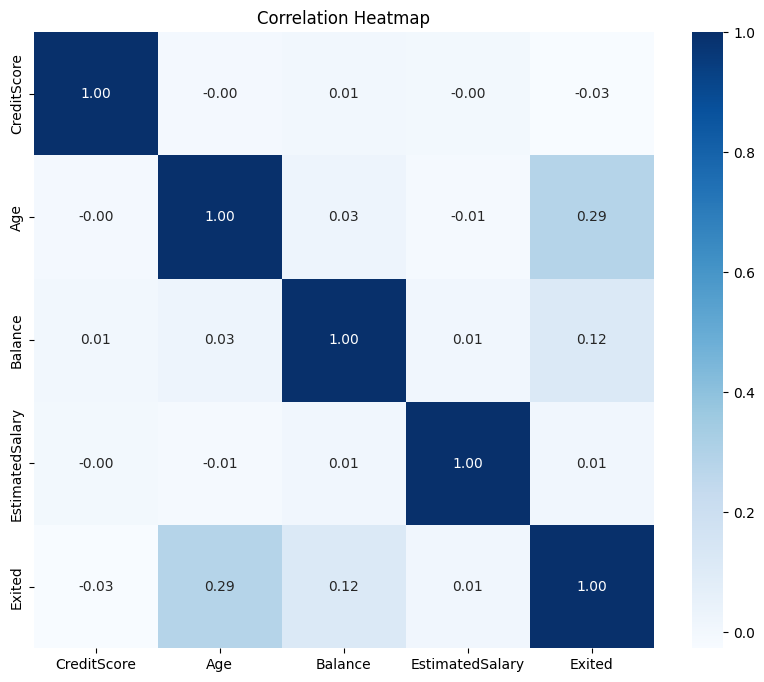

In [7]:
# Compute correlation matrix
corr_matrix = df[numerical_features + ['Exited']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 4. Boxplots for Numerical Features by Target Variable
Compare the distribution of numerical features for customers who churned (Exited=1) and those who stayed (Exited=0).

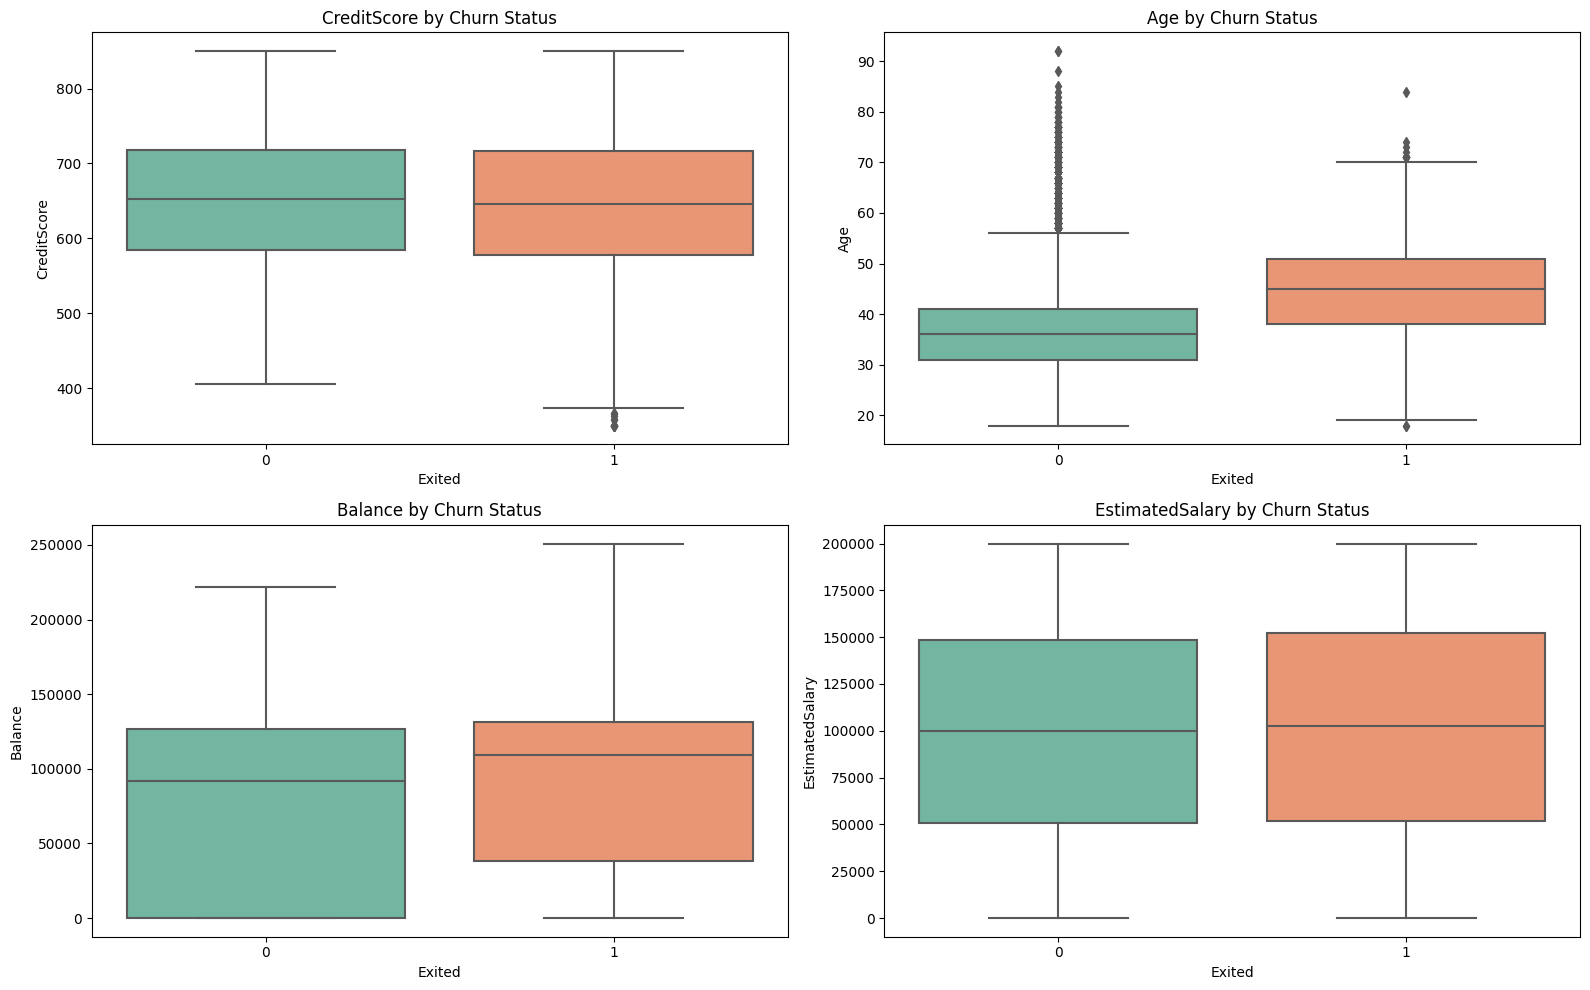

In [8]:
# Plot boxplots for numerical features by target variable
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Churn Status')
plt.tight_layout()
plt.show()

### 5. Churn Rate by Categorical Features
Visualize the churn rate (Exited) across different categories of categorical features.

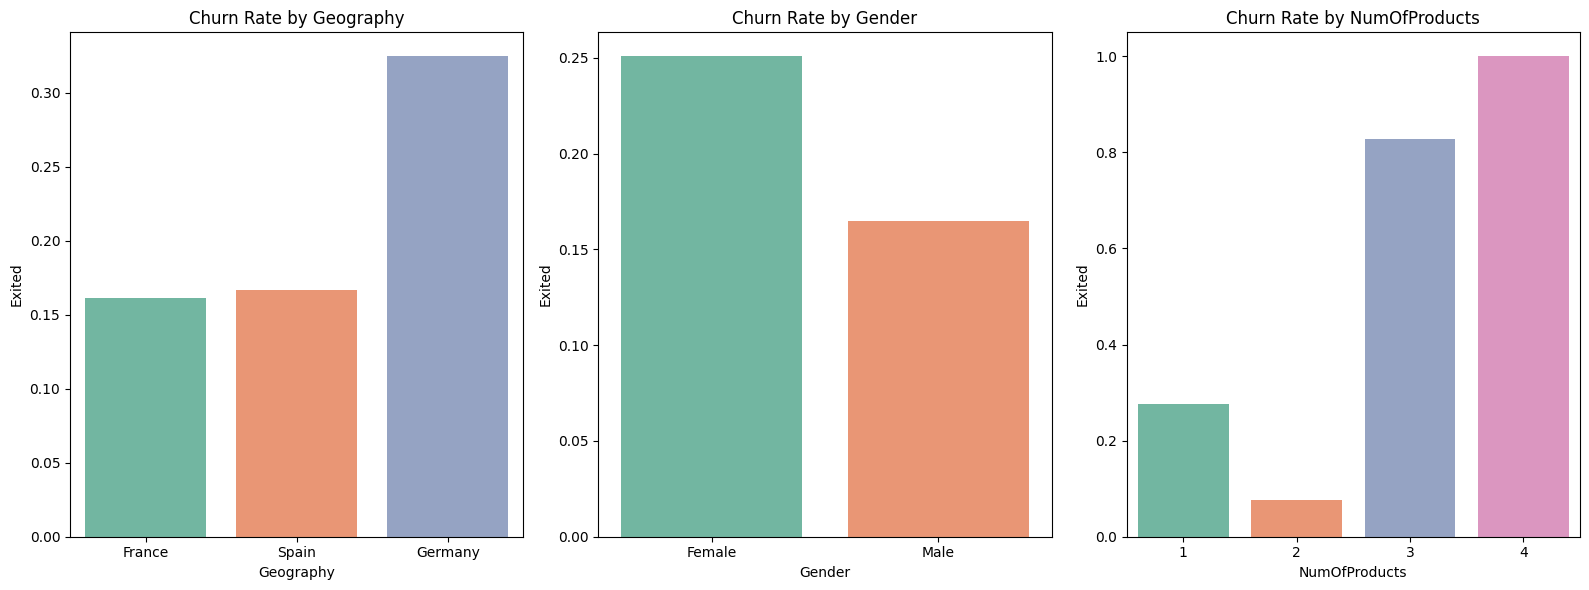

In [9]:
# Plot churn rate by categorical features
plt.figure(figsize=(16, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=feature, y='Exited', data=df, palette='Set2', errorbar=None)
    plt.title(f'Churn Rate by {feature}')
plt.tight_layout()
plt.show()

### 6. Pairplot for Numerical Features
Visualize pairwise relationships between numerical features and the target variable.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

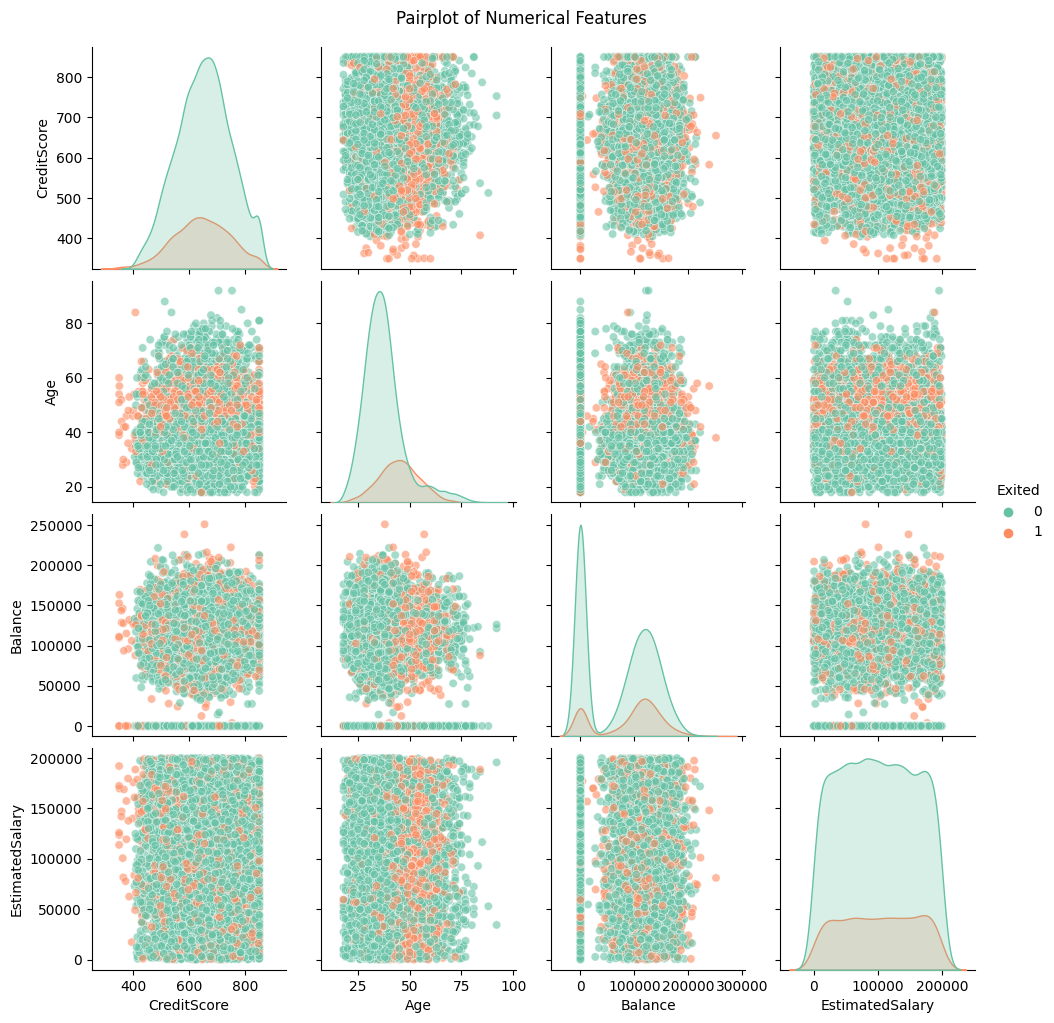

In [10]:

# Create the pairplot
pairplot = sns.pairplot(df[numerical_features + ['Exited']], 
                        hue='Exited', 
                        palette='Set2', 
                        diag_kind='kde', 
                        plot_kws={'alpha': 0.6})

# Adjust the title position
pairplot.fig.suptitle('Pairplot of Numerical Features', y=1.02)

# Show the plot
plt.show()

### 8. Distribution of Tenure
Visualize the distribution of Tenure (how long a customer has been with the bank).

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


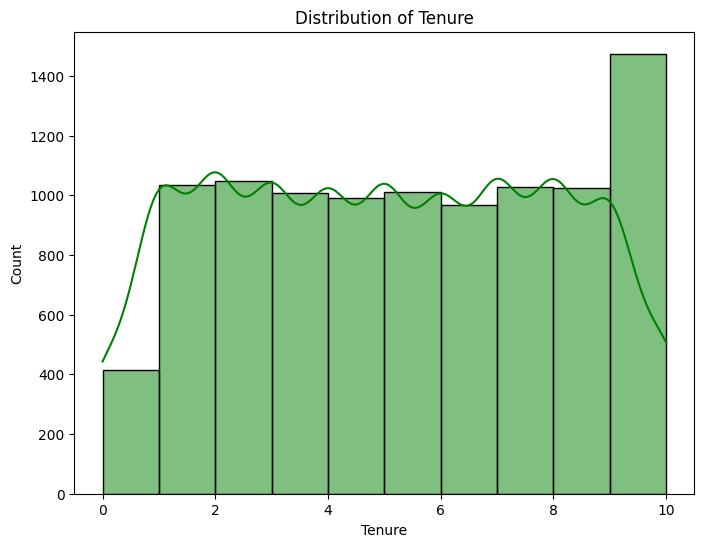

In [11]:
# Plot distribution of Tenure
plt.figure(figsize=(8, 6))
sns.histplot(df['Tenure'], kde=True, bins=10, color='green')
plt.title('Distribution of Tenure')
plt.show()

### 9. Churn Rate by Tenure
Visualize the churn rate across different tenure values.

<ipython-input-12-412004276a8b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tenure', y='Exited', data=df, palette='Set2', ci=None)


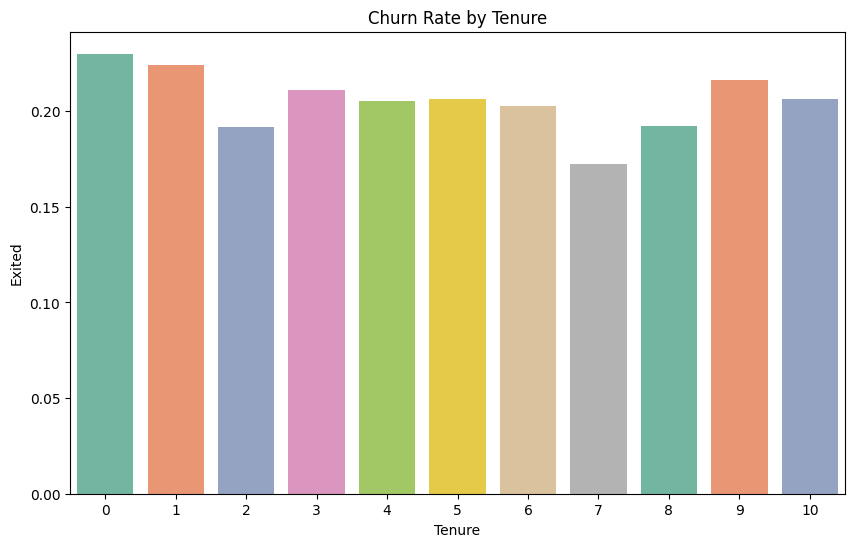

In [12]:
# Plot churn rate by Tenure
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y='Exited', data=df, palette='Set2', ci=None)
plt.title('Churn Rate by Tenure')
plt.show()

### 10. Pie Chart for Churn Distribution
Visualize the proportion of customers who churned vs. those who stayed.

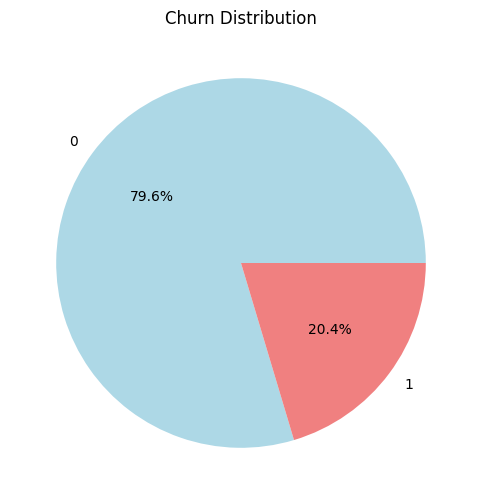

In [13]:
# Plot pie chart for churn distribution
plt.figure(figsize=(6, 6))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

## PREPROCESSING DATA


## Steps Performed
1. **Drop Unnecessary Columns**:
   - Columns like `RowNumber`, `CustomerId`, and `Surname` were dropped as they are not useful for prediction.

2. **Handle Missing Values**:
   - No missing values were found in the dataset.

3. **Encode Categorical Features**:
   - `Geography` and `Gender` were one-hot encoded to convert them into numerical format.

4. **Scale Numerical Features**:
   - Numerical features like `CreditScore`, `Age`, `Balance`, and `EstimatedSalary` were scaled using `StandardScaler` to ensure they are on the same scale.

5. **Split the Dataset**:
   - The dataset was split into training (80%) and testing (20%) sets.


## Preprocessed Data
- Features: Scaled numerical features and encoded categorical features.
- Target: `Exited` (0 or 1).

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)



In [15]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3063,609,France,Male,32,7,71872.19,1,1,1,151924.9,0


In [16]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [17]:
# One-hot encode 'Geography'
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [18]:
df.sample()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
7212,711,0,25,5,190066.54,1,0,0,51345.39,1,False,False


## Data Splits

In [21]:
# Split features and target
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target


In [22]:
X.shape


(10000, 11)

In [23]:
y.shape

(10000,)

### Scaling Features

In [26]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model: Artificial Neural Network (ANN)

#### Model Architecture
The ANN model was built using **TensorFlow/Keras** with the following architecture:

1. **Input Layer**:
   - Number of neurons: `128`
   - Activation function: `ReLU`
   - Input dimension: `X_train.shape[1]` (number of features in the training data).

2. **First Hidden Layer**:
   - Number of neurons: `128`
   - Activation function: `ReLU`
   - Dropout: `0.2` (to prevent overfitting).

3. **Second Hidden Layer**:
   - Number of neurons: `64`
   - Activation function: `ReLU`
   - Dropout: `0.2` (to prevent overfitting).

4. **Output Layer**:
   - Number of neurons: `1`
   - Activation function: `Sigmoid` (for binary classification).

#### Model Compilation
- **Optimizer**: `Adam` (adaptive learning rate optimization algorithm).
- **Loss Function**: `Binary Crossentropy` (suitable for binary classification tasks).
- **Metrics**: `Accuracy` (to monitor the model's performance during training).

#### Model Summary
The model summary is as follows:

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the ANN
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))  # Dropout for regularization

# Add second hidden layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

## Training Model **ANN**

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7922 - loss: 0.4954 - val_accuracy: 0.8356 - val_loss: 0.4011
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8291 - loss: 0.4169 - val_accuracy: 0.8537 - val_loss: 0.3685
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8407 - loss: 0.3827 - val_accuracy: 0.8556 - val_loss: 0.3580
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8501 - loss: 0.3706 - val_accuracy: 0.8587 - val_loss: 0.3524
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8600 - loss: 0.3478 - val_accuracy: 0.8575 - val_loss: 0.3472
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8553 - loss: 0.3514 - val_accuracy: 0.8581 - val_loss: 0.3463
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.3539 - val_accuracy: 0.8556 - val_loss: 0.3412
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8486 - loss: 0.3558 - val_accu

## Model Evaluation

#### 1. Training and Validation Loss/Accuracy
The model's training and validation loss/accuracy were plotted to monitor its performance during training.

- **Training Loss**: Decreased steadily, indicating the model was learning effectively.
- **Validation Loss**: Initially decreased but plateaued, suggesting potential overfitting.
- **Training Accuracy**: Increased steadily, reaching close to 90%.
- **Validation Accuracy**: Improved but stabilized around 86%, indicating good generalization.

These plots help visualize how well the model learned from the training data and how it performed on unseen validation data.

---





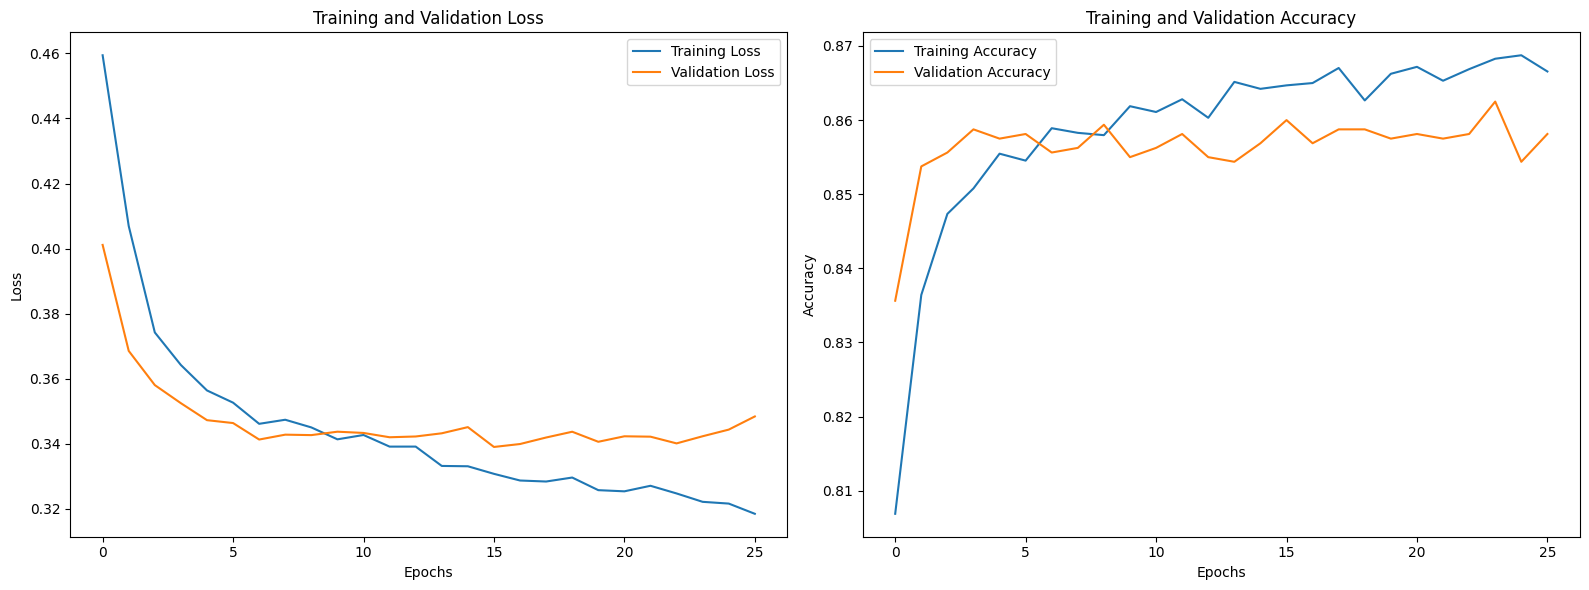

In [29]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

#### 4. ROC Curve
The ROC curve visualizes the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) for different classification thresholds. The Area Under the Curve (AUC) score quantifies the model's performance.

- **AUC Score**: 0.85, indicating good performance.
- The ROC curve shows that the model performs significantly better than a random classifier (AUC = 0.5).

The ROC curve and AUC score provide a comprehensive evaluation of the model's ability to distinguish between the two classes.

---

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


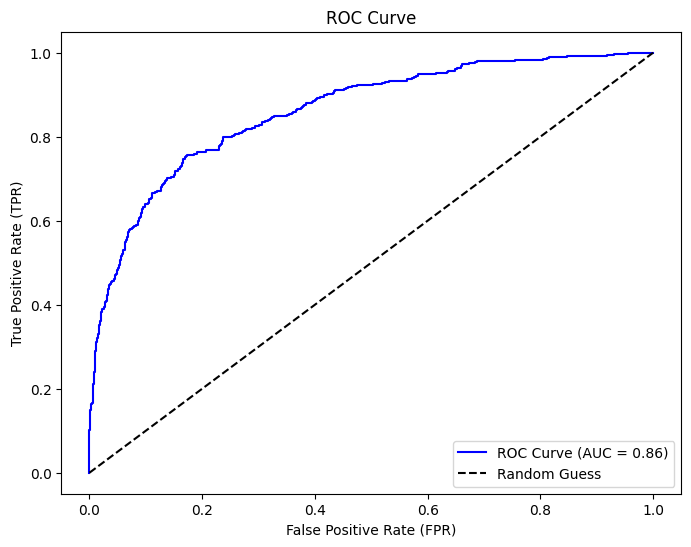

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### 2. Confusion Matrix
The confusion matrix provides a breakdown of the model's predictions:

- **True Positives (TP)**: 202 (correctly predicted churn).
- **True Negatives (TN)**: 1520 (correctly predicted no churn).
- **False Positives (FP)**: 87 (incorrectly predicted churn).
- **False Negatives (FN)**: 191 (incorrectly predicted no churn).

The confusion matrix highlights the model's ability to correctly classify customers who stayed and those who left. It also shows areas where the model struggled, such as predicting churn (class 1).
#### 3. Classification Report
The classification report provides precision, recall, F1-score, and support for each class:

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
  - For class 0 (Stay): 89%.
  - For class 1 (Leave): 70%.
- **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class.
  - For class 0 (Stay): 95%.
  - For class 1 (Leave): 51%.
- **F1-Score**: The weighted average of precision and recall.
  - For class 0 (Stay): 92%.
  - For class 1 (Leave): 59%.
- **Support**: The number of actual occurrences of each class in the test set.

The classification report shows that the model performs well in predicting customers who stayed (class 0) but struggles with predicting customers who left (class 1).

---


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[1539   68]
 [ 214  179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000




#### Key Insights
- The model achieves an overall accuracy of 86% on the test set.
- It performs well in predicting customers who stayed (class 0) but struggles with predicting customers who left (class 1).
- The ROC-AUC score of 0.85 indicates good classification performance.
- Further improvements can be made by addressing class imbalance and tuning hyperparameters.

### Feature Importance

#### Permutation Importance
Permutation importance was used to evaluate the importance of each feature in the model. This method measures the increase in the model's prediction error after shuffling a feature's values. The higher the increase in error, the more important the feature is.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to calculate permutation importance
def permutation_importance(model, X, y, n_repeats=10, random_state=42):
    np.random.seed(random_state)
    baseline_score = accuracy_score(y, (model.predict(X) > 0.5).astype(int))
    feature_importances = np.zeros(X.shape[1])

    for i in range(X.shape[1]):  # Loop through each feature
        temp_X = X.copy()
        scores = []

        for _ in range(n_repeats):  # Repeat n_repeats times
            temp_X[:, i] = np.random.permutation(temp_X[:, i])  # Shuffle the feature
            y_pred = (model.predict(temp_X) > 0.5).astype(int)
            scores.append(accuracy_score(y, y_pred))

        feature_importances[i] = baseline_score - np.mean(scores)  # Importance = baseline - shuffled score

    return feature_importances



In [39]:
# Calculate permutation importance
importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━

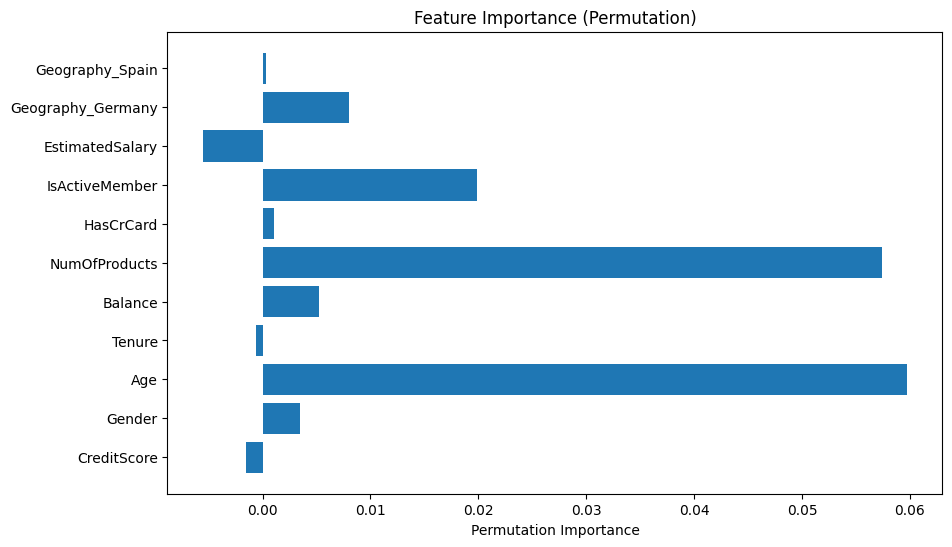

In [40]:

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), importances, align='center')
plt.yticks(range(X_test.shape[1]), X.columns)  # Use feature names from the original DataFrame
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


#### Key Insights
- **Number of Features**: The dataset contains 11 features after preprocessing.
- **Most Important Features**:
  - **Age**: Identified as the most important feature, indicating that age plays a significant role in predicting customer churn.
  - **Balance**: The second most important feature, suggesting that account balance is a strong predictor of churn.
  - **CreditScore**: Also contributes significantly to the model's predictions.
- **Least Important Features**:
  - Features like `EstimatedSalary` and `Tenure` have relatively lower importance, indicating they have less impact on the model's predictions.

#### Visualization
A horizontal bar plot was created to visualize the permutation importance of each feature. The plot clearly shows the relative importance of features, with `Age` and `Balance` having the highest importance scores.

#### Conclusion
- **Age** and **Balance** are the most critical features for predicting customer churn.
- The model relies heavily on these features to make accurate predictions.
- Less important features, such as `EstimatedSalary`, could potentially be removed or further analyzed to simplify the model without significantly impacting performance.

------------